### The Data consists of 13 predictors and the label is Median House Value

Our aim here is to fit a good model to the data which can predict the Median House value given the 13 features.

In [1]:
#Importing the neccessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

In [5]:
#Loading the data

data = pd.read_csv("California_Houses.csv")

In [6]:
#Lets have a peek into the data

data.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.517001   
1   554279.850069         733236.884360         65049.908574   
2   554610.717069         733525.682937         64867.289833   
3   555194.266086         734095.290744         65287.138412   
4   555194.266086         734095.290744         65287.138412   

   Distance_to_SanFrancisco  
0              21250.213767  
1              20880.600400  
2              18811.487450  
3              18031.047568  
4              18031.047568

In [7]:
data.shape

(20640, 14)

This data set consists of 20640 rows(observation about each house) and 14 columns. Out of which the first column is the label

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

There are no null values and hence we are good go!

In [9]:
#A little statistics about the data

data.describe()

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
count       20640.000000    2.064000e+04          2.064000e+04   
mean        40509.264883    2.694220e+05          3.981649e+05   
std         49140.039160    2.477324e+05          2.894006e+05   
min           120.676447    4.205891e+02          4.849180e+02   
25%          9079.756762    3.211125e+04          1.594264e+05   
50%         20522.019101    1.736675e+05          2.147398e+05   
75%         49830.414479    5.271562e+05          7.057954e+05   
max        333804.686371    1.018260e+06          1.196919e+06   

       Distance_to_SanJose  Distance_to_SanFrancisco  
count         20640.000000              20640.000000  
mean         349187.551219             386688.422291  
std          217149.875026             250122.192316  
min             569.448118                456.141313  
25%          113119.928682             117395.477505  
50%          459758.877000             526546.661701  
75%          516946.490963             584552.007907  
max          836762.678210             903627.663298

### Exploratory Data Analysis

Obtaining Distribution of various features

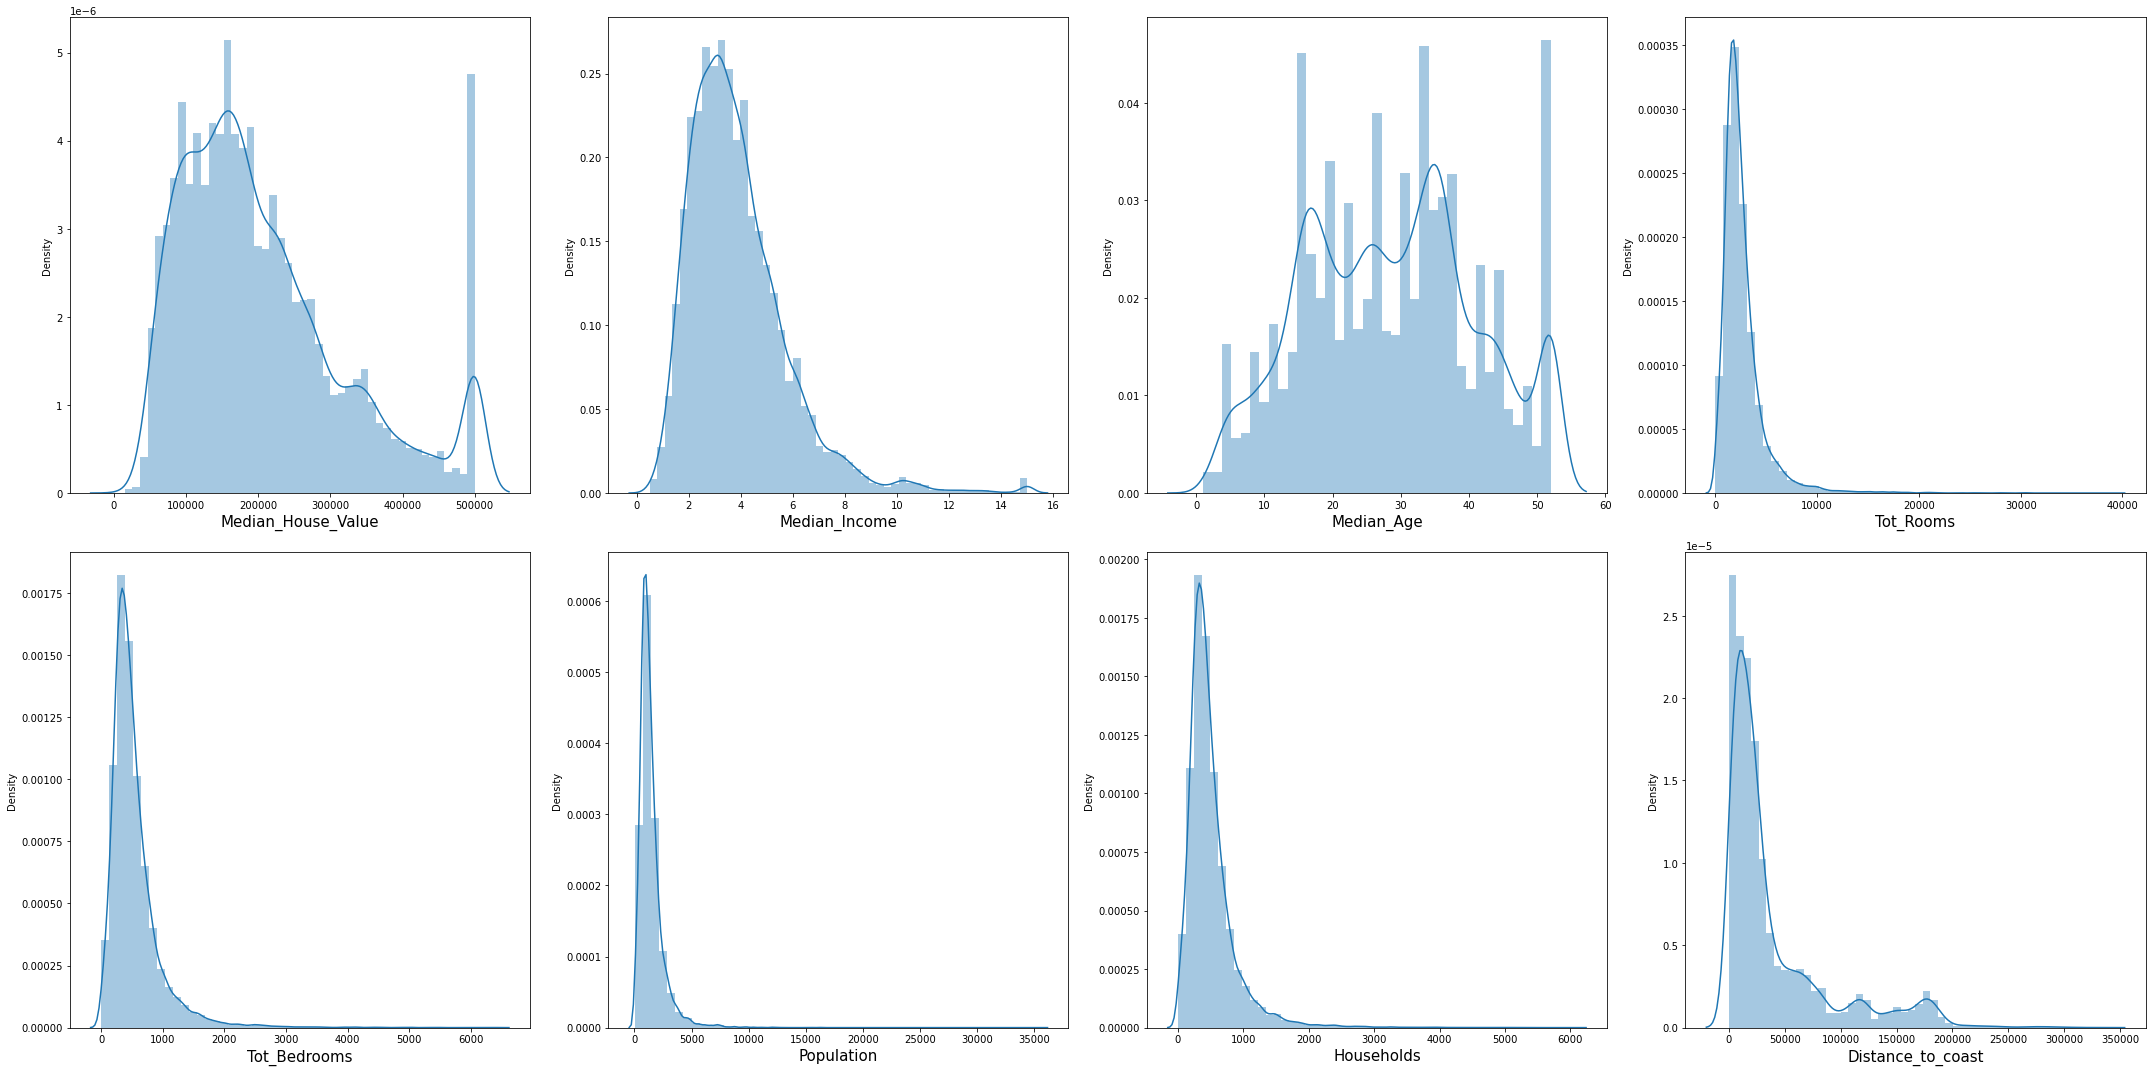

In [7]:
plots_var = ["Median_House_Value", "Median_Income", "Median_Age", "Tot_Rooms",
             "Tot_Bedrooms", "Population", "Households", "Distance_to_coast"]

plt.figure(figsize = (30, 15))


for i in enumerate(plots_var):
    plt.subplot(2, 4, i[0]+1)
    ax = sns.distplot(data[i[1]])
    ax.set_xlabel(i[1],fontsize=15)
plt.tight_layout()
plt.show()

#### Correlation Analysis

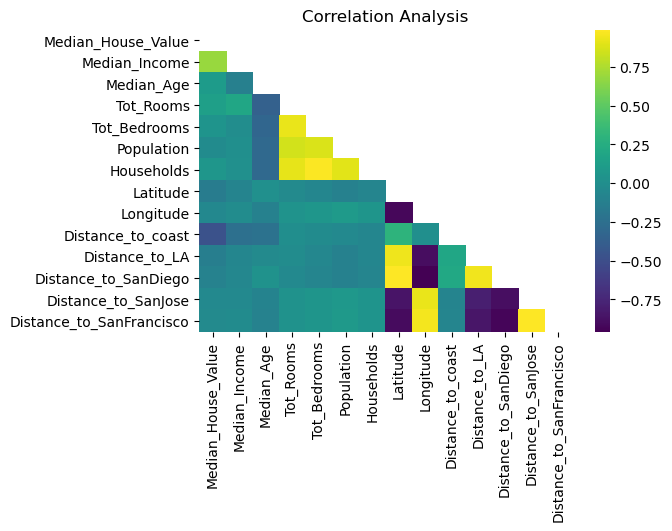

In [8]:
corr = data.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask = mask, annot=False,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

Median House Value is highly correlated(positively) to Median Income.<br>
Distance from coast is negatively correlated.<br>
So let us closely look at these two variables

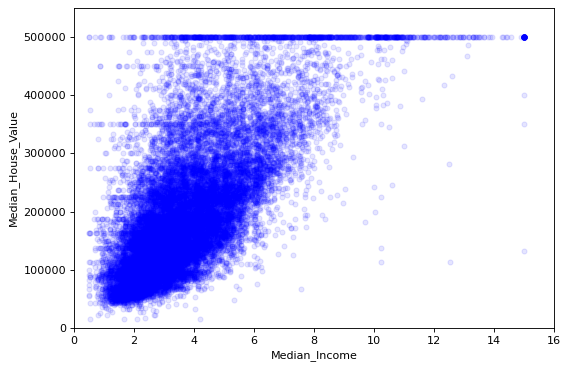

In [10]:
fig = plt.figure(dpi = 80, figsize = (6,4))
ax = fig.add_axes([1,1,1,1])

data.plot(kind="scatter", x="Median_Income", y="Median_House_Value",
             alpha=0.1,color = 'blue',ax=ax)
plt.axis([0, 16, 0, 550000])
plt.show()

This plot reveals a few things. First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.

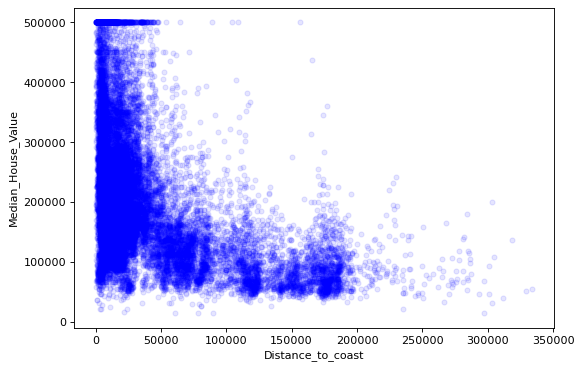

In [13]:
fig = plt.figure(dpi = 80, figsize = (6,4))
ax = fig.add_axes([1,1,1,1])

data.plot(kind="scatter", x="Distance_to_coast", y="Median_House_Value",
             alpha=0.1,color = 'blue',ax=ax)
plt.show()

So with this plot we can say that there is negative correlation between Distance_to_coast and Median_house_value

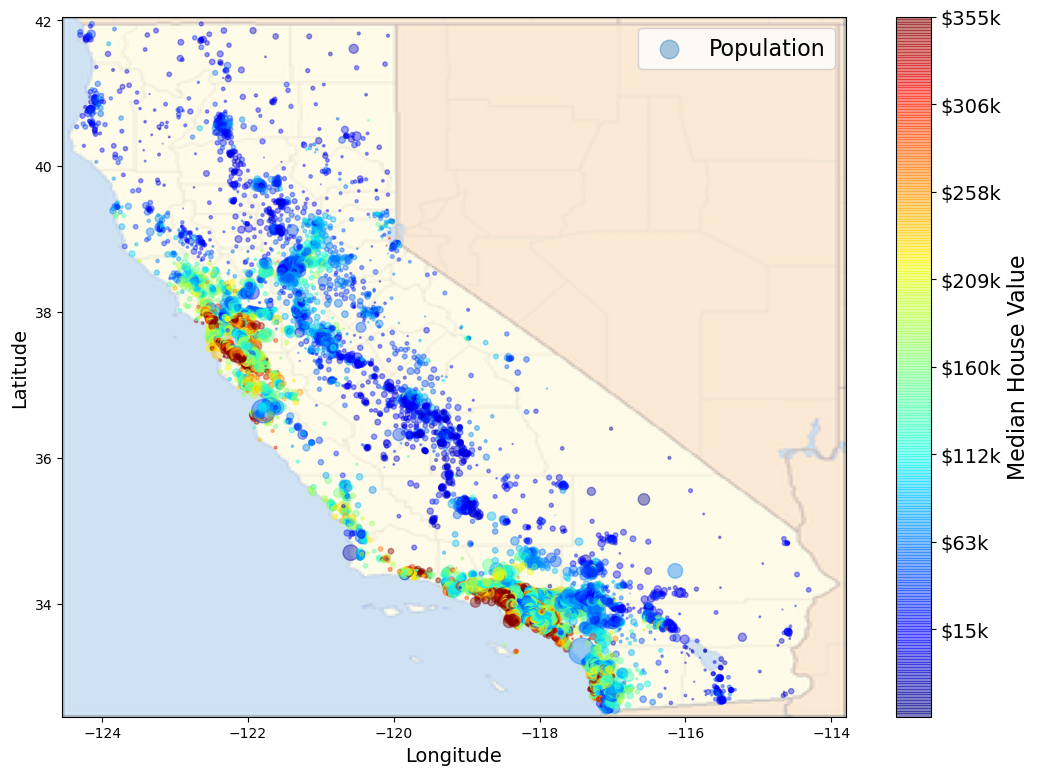

In [128]:
fig = plt.figure(dpi = 100,figsize = (4,4))
ax = fig.add_axes([1,1,1,1])

import matplotlib.image as mpimg
california_img=mpimg.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/California_Locator_Map.PNG/280px-California_Locator_Map.PNG")
data.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,7),ax=ax,
                       s=data['Population']/100, label="Population",
                       c="Median_House_Value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = data["Median_House_Value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show();

We can clearly makeout that houses near the cost are very costly. <br>
This image tells that the housing price is very much related to the location and to the population density. The price increases with increase in Population and also with reduction in distance from the coast(i.e., more nearer the house from the coast, higher the price)

So now we have finished the EDA, lets move on to find a good fit for the data. 

#### Train Test Split

Before applying our model we split the data as train and test data. Here train data is used for learning and test is used to check how well the model can predict future values

In [10]:
X = data.drop(["Median_House_Value"], axis = 1)
Y = data["Median_House_Value"]

In [11]:
from sklearn.model_selection import train_test_split

train_x,test_x, train_y, test_y = train_test_split(X, Y,train_size=0.7,random_state=42)

In [12]:
# Now we standardise the numeric data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_x = pd.DataFrame(sc.fit_transform(train_x))
test_x= pd.DataFrame(sc.transform(test_x))

Now that we have finished the pre processing, lets move on to apply Linear Regression model to the data

#### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg. fit(train_X, train_Y)

LinearRegression()

In [25]:
y_train_pred.shape

(14447,)

In [21]:
# Predicting the Median_House_value

y_train_pred = reg.predict(train_X)
y_test_pred = reg.predict(test_X)

In [26]:
from sklearn.metrics import r2_score

score1 = r2_score(train_Y, y_train_pred)
score2= r2_score(test_Y, y_test_pred)

In [27]:
print("R-squared value for Train data is :", score1)
print("R-squared value for Test data is :", score2)

R-squared value for Train data is : 0.6469138264616094
R-squared value for Test data is : 0.6454004713594229


R-squared value is not good its approx 0.64 which implies linear regression is not a good fit. This may be because the data doesn't satisfy the assumptions of linear regression.

lets check The first assumption of linearity between predictors and predicted variable

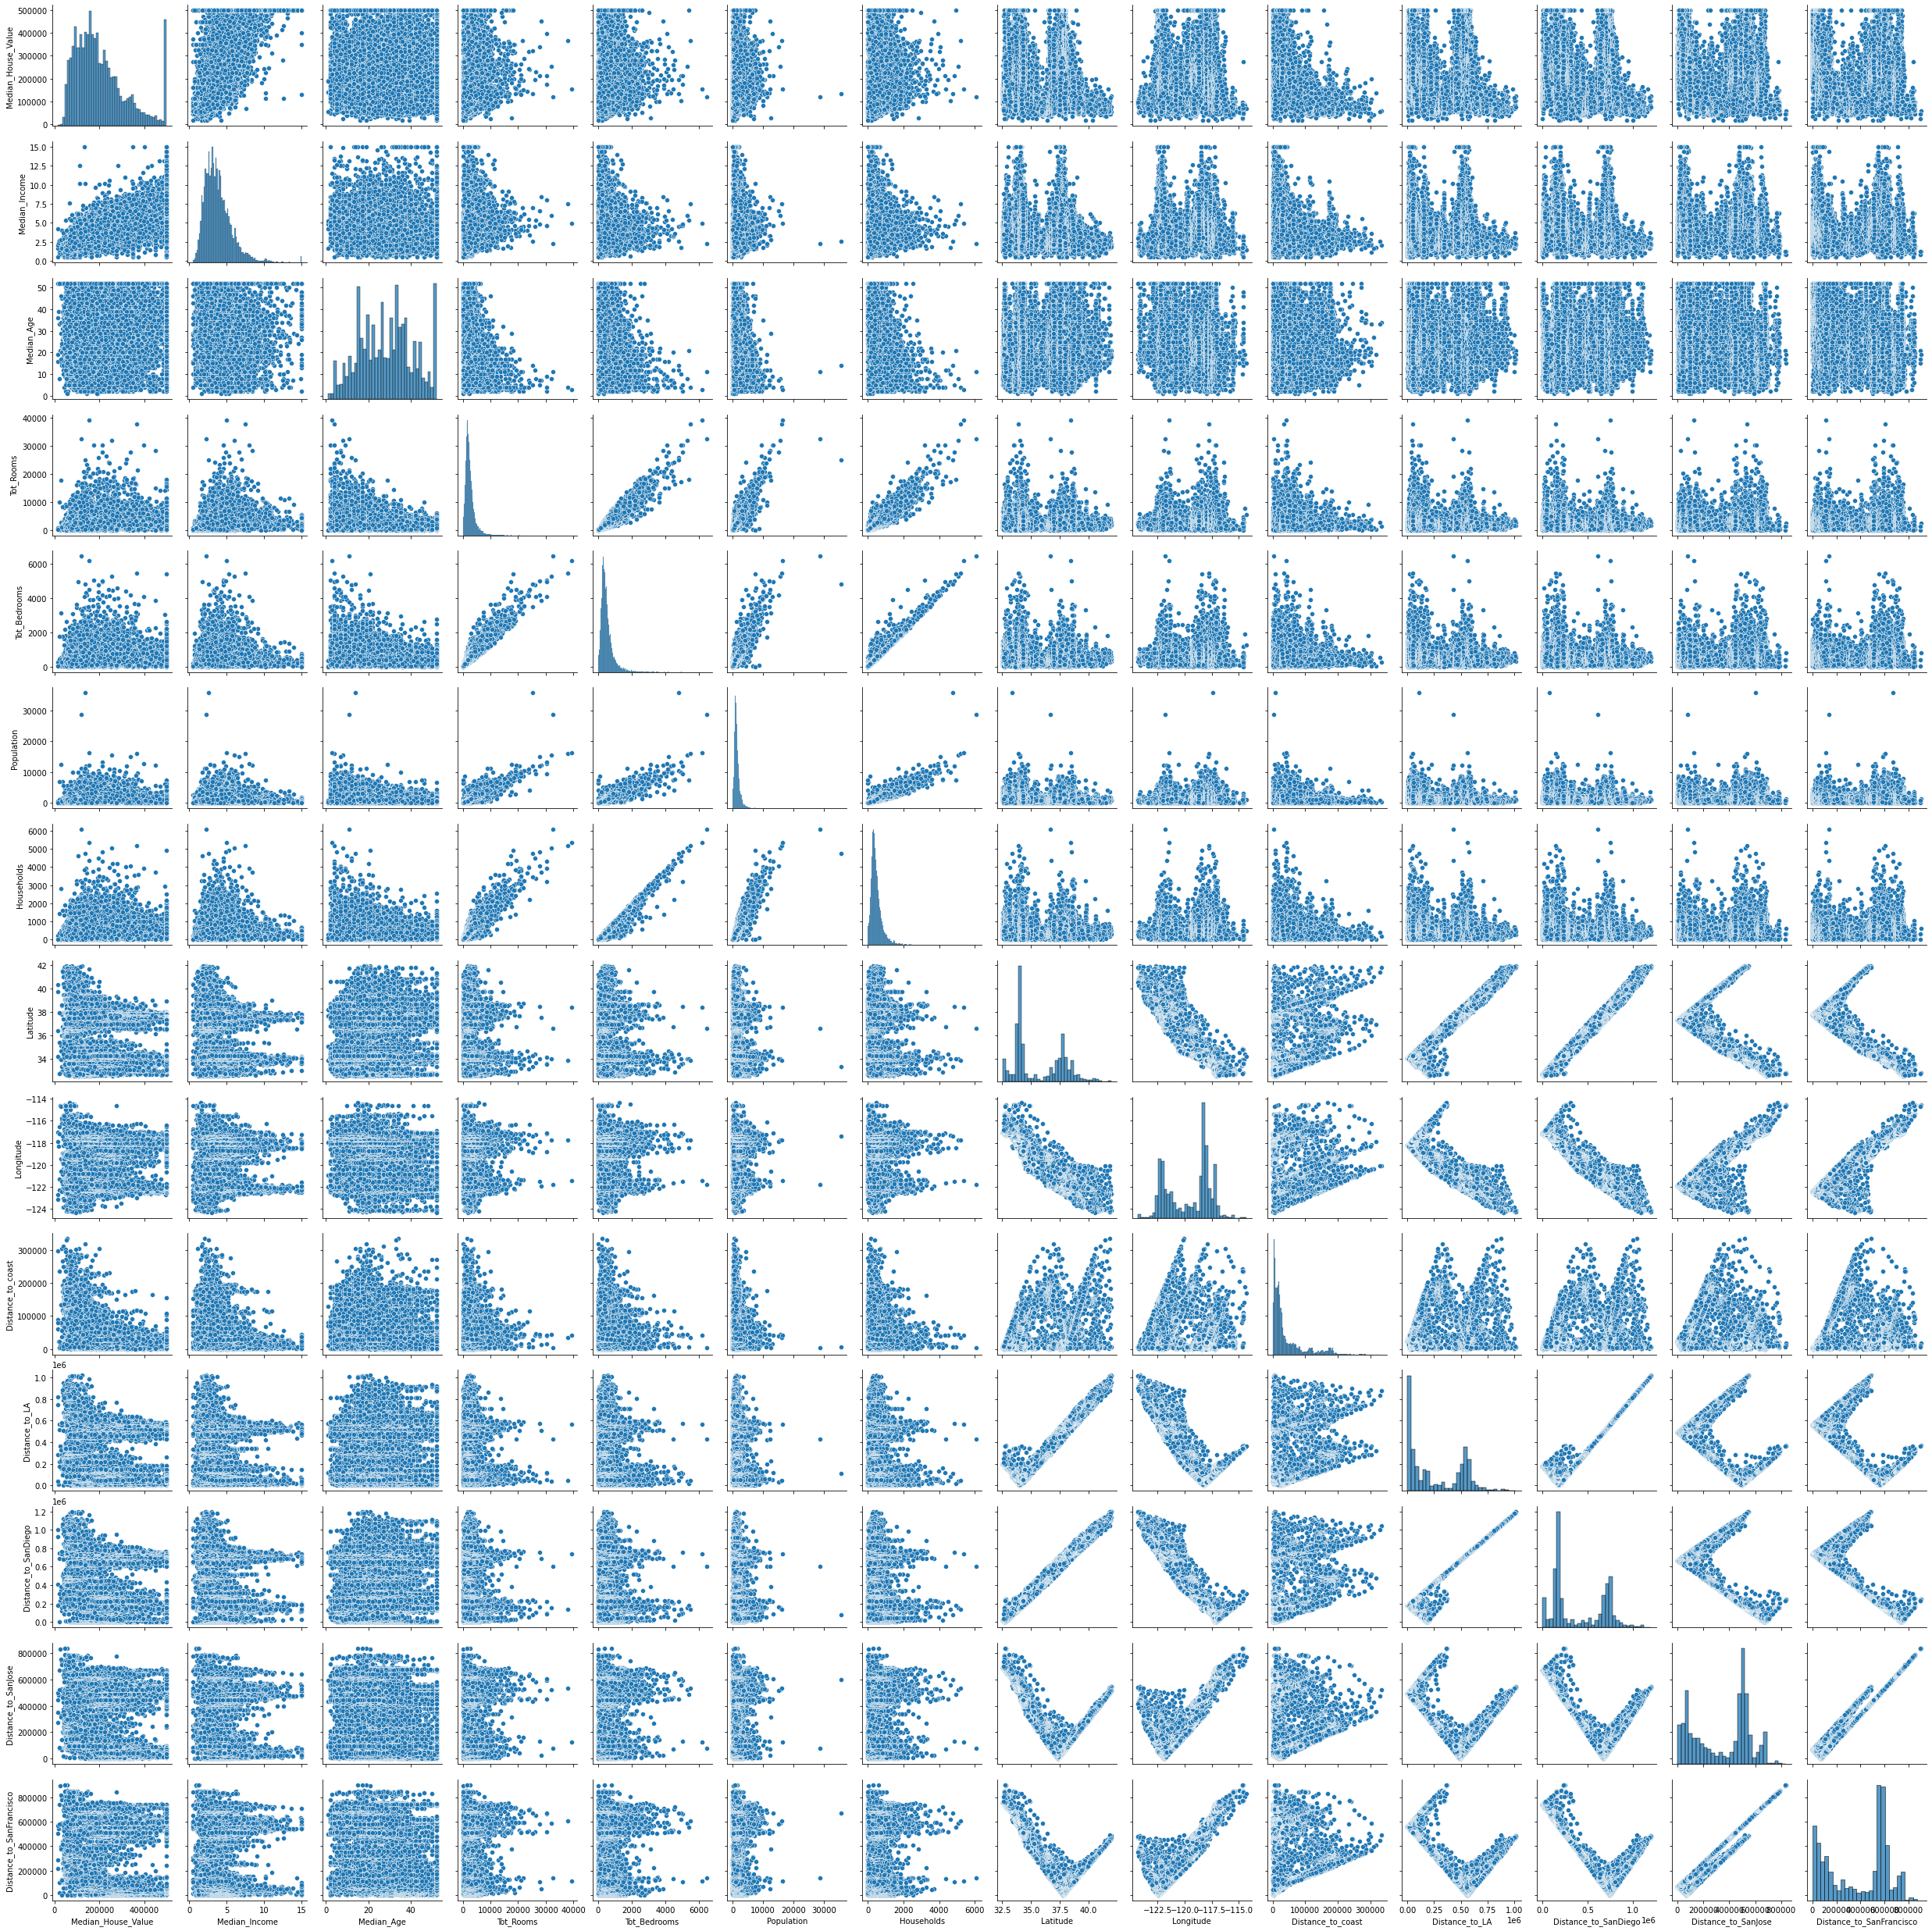

In [28]:
sns.pairplot(data);

Here it is clear that except Median_Income no other features are linearly related to the predicted variable. So the first assumption is itself not satisfied. We use transformations on these features to make them naer linearly related to the predicted variable. Let's not go so deep and move on tgo our next model. i.e., K-NN regression model


#### K-NN

In [14]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()

In [34]:
kn.fit(train_X, train_Y)

KNeighborsRegressor()

In [36]:
# Predicting the Median_House_value

y_train_pred = kn.predict(train_X)
y_test_pred = kn.predict(test_X)

In [37]:
score1 = r2_score(train_Y, y_train_pred)
score2= r2_score(test_Y, y_test_pred)

print("R-squared value for Train data is :", score1)
print("R-squared value for Test data is :", score2)

R-squared value for Train data is : 0.8250564829186597
R-squared value for Test data is : 0.7297313803763582


The perfomance is much better than LinearRegressin Model. But it is overfitting. Let's try to further improve the model using hyperparameter tuning

In [120]:
hyperparameter = {"n_neighbors":[i for i in range(1, 10, 2)],
                 "p":[1, 2]}

In [121]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(kn, hyperparameter, scoring = "r2") 
search.fit(train_X, train_Y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9], 'p': [1, 2]},
             scoring='r2')

In [123]:
search.cv_results_

{'mean_fit_time': array([0.01970978, 0.0177597 , 0.01902642, 0.01669393, 0.01876049,
        0.01570692, 0.02116604, 0.01390495, 0.01752963, 0.01712065]),
 'std_fit_time': array([0.00605692, 0.00914014, 0.00612911, 0.00212467, 0.00625979,
        0.00018744, 0.00686072, 0.0034327 , 0.00752684, 0.00354778]),
 'mean_score_time': array([0.07785764, 0.06073632, 0.11849861, 0.08637872, 0.13187709,
        0.10359097, 0.14518719, 0.11478324, 0.15834613, 0.12415338]),
 'std_score_time': array([0.00141137, 0.00912078, 0.00460321, 0.00691609, 0.00749786,
        0.00764267, 0.00618725, 0.00639992, 0.0025429 , 0.00345212]),
 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
              mask=[False, False, False, False, False, False, False, False,
     

In [126]:
#Define a new model with these parameters

knn = KNeighborsRegressor(n_neighbors= search.best_params_["n_neighbors"], p = search.best_params_["p"] )
knn.fit(train_X, train_Y)

KNeighborsRegressor(n_neighbors=9, p=1)

In [127]:
#Prediction and evaluation

y_train_pred = knn.predict(train_X)
y_test_pred = knn.predict(test_X)

score1 = r2_score(train_Y, y_train_pred)
score2= r2_score(test_Y, y_test_pred)

print("R-squared value for Train data is :", score1)
print("R-squared value for Test data is :", score2)

R-squared value for Train data is : 0.8148729497010486
R-squared value for Test data is : 0.7668913883718994


Though the train score is less, the test score has increased which is a better improvement

This model can be used to predict the House Price of any given observation

We can also apply other regression models and try to improve the performance